# Tasks 2020
***

The following contains solutions to the task assignments for the Fundamentals of Data Analysis module 2020.

The author of the following tasks is Dervla Candon (G00283361@gmit.ie)
***

## Task 1

_Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A'] should have output {'A': 3, 'B': 1, 'C': 1} . Your code should not depend on any module from the standard library or otherwise. You should research the task first and include a description with references of your algorithm in the notebook._


To complete this task, the function will need to perform the following steps:
 * take a list as input
 * iterate through the list
 * if an element is unique, it is added to the output set and assigned a count of 1
 * if an element is not unique, its count in the output set is increased by 1
 
In order to produce an output with a key:value format, a dictionary set must be used[1][2].

In [1]:
def counts(input_list):
    #creating an empty dictionary to hold the output
    output = dict()
    #for loop will iterate through each element in the input
    for i in input_list:
        #2 scenarios covered by if loop, either the element is new and needs to be added to the output
        #or the element already exists in the output and the value should be increased accordingly
        if i not in output:
            output[i] = 1
        else:
            output[i] += 1
    return output

In [2]:
#testing the function using the sample input in the task brief
counts(['A','A','B','C','A'])

{'A': 3, 'B': 1, 'C': 1}

In [3]:
#testing the function with further input
x = [2,4,8,4,2,6,9,2,4,5,6,7,8,1,1,1,1,7]
counts(x)

{2: 3, 4: 3, 8: 2, 6: 2, 9: 1, 5: 1, 7: 2, 1: 4}

***

## Task 2

_Write a Python function called dicerolls that simulates rolling dice. Your function should take two parameters: the number of dice k and the number of times to roll the dice n. The function should simulate randomly rolling k dice n times, keeping track of each total face value. It should then return a dictionary with the number of times each possible total face value occurred. So, calling the function as diceroll(k=2, n=1000) should return a dictionary like: {2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36}_

_You can use any module from the Python standard library you wish and you should include a description with references of your algorithm in the notebook._

At a high level the dicerolls function will perform the following steps:
 - randomly generate a number between 1 and 6 inclusive k times
 - sum together the k values, and store this value within an array
 - repeat the above 2 steps n times.
 - input the resulting array into the counts() function to output the results in a summarising dictionary.
 
In order to generate random integers, randit from the random library in python will provide the required functionality [3].

In [4]:
import random
def dicerolls(k,n):
    # define an empty array to store the value for each iteration of rolling the dice
    output = []
    for i in range(n):
        # define roll as a variable to store the sum of all rolled dice for each throw
        roll = 0
        for j in range(k):
            # randint is inclusive of the upper and lower bounds, so 1 and 6 are used as input parameters
            roll += random.randint(1,6)
        output.append(roll)
    # the counts function will add up the occurence of each possible result
    return counts(output)

When a single dice is used, it is expected that each value would have an equal likelihood of appearing.

In the below example, I have taken a large size n to better show how evenly spread the frequency is.
For n=10000, the expected frequency of each number would be (1/6)*10000 = 1666.67

In [5]:
x = dicerolls(1,10000)
x

{5: 1664, 3: 1639, 6: 1635, 1: 1738, 2: 1704, 4: 1620}

As the number of dice increases, the likelihood of occurences now varies; the more ways a number can be generated, the higher the expected frequency

In [6]:
y = dicerolls(2,10000)
y

{5: 1120,
 9: 1137,
 8: 1372,
 4: 840,
 7: 1651,
 3: 564,
 6: 1405,
 2: 303,
 11: 528,
 12: 263,
 10: 817}

A plot of the single die should be approaching a uniform trend; at first glance this does not seem realistic, as the plot appears to vary greatly between die values.

However, this apparent variance makes more sense when the values plotted on the y-axis are noted.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100

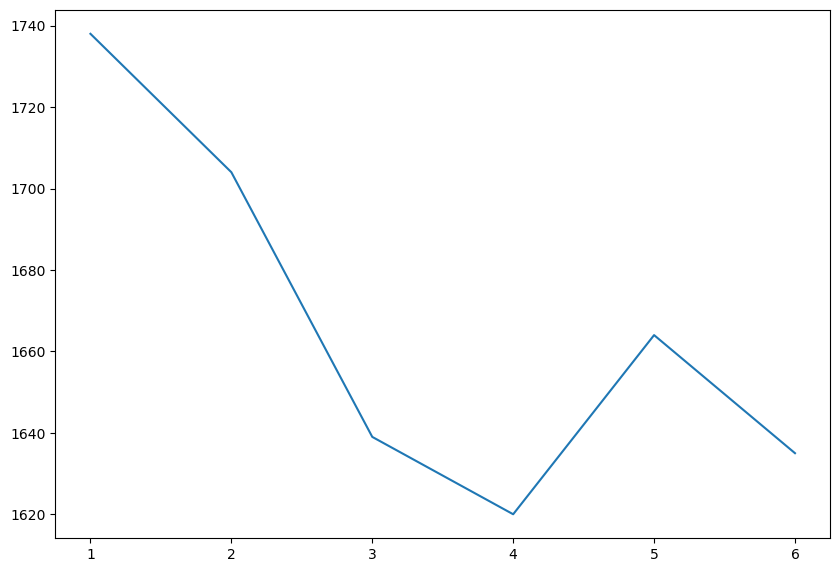

In [8]:
# method for plotting a dictionary found at [4]
a,b = zip(*sorted(x.items()))
plt.plot(a,b)
plt.show()

By setting a fixed lower and upper limit on the y-axis, the uniform trend of the results is now much more apparent.

<function matplotlib.pyplot.show(*args, **kw)>

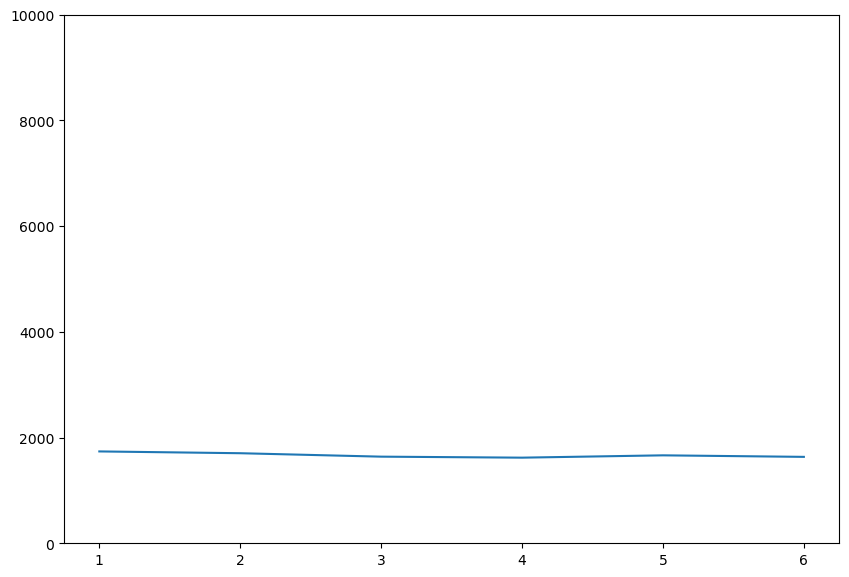

In [9]:
plt.ylim(bottom=0,top=10000)
plt.plot(a,b)
plt.show

As the number of dice increases, the graph would now be expected to peak at a central point, where there are a greater number of combinations which result in the total value.

Given the symmetry between high/low values and the number of combinations which can generate those values (for example, both 2 and 12, the highest and lowest possible values, both have 1 combination which generates that result when 2 dice are used), any plot of 2 or more dice should be (roughly) symmetrical

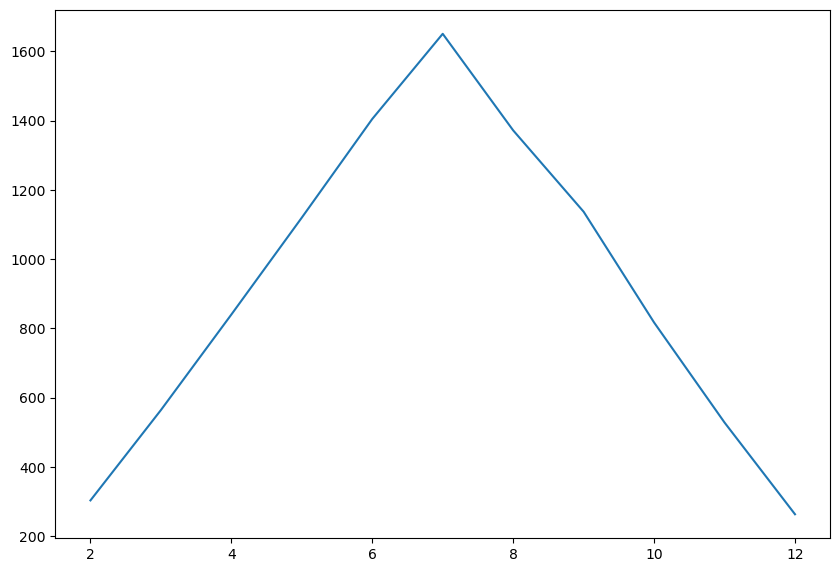

In [10]:
c,d = zip(*sorted(y.items()))
plt.plot(c,d)
plt.show()

## Task 3

*The numpy.random.binomial function can be used to simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a coin is flipped many times then the number of heads is well approximated by a bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively low, and the chances of getting any other number of heads decreases as you move away from 50 in either direction towards 0 or 100. Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve. You should explain your work in a Markdown cell above the code*

***

The situation described above is known as the central limit theorem, whereby regardless of the probability distribution of a given event, if the event is repeated a sufficiently large number of times, then the distribution of the results will follow a normal distribution [5]. 

The numpy.random.binomial function takes up to 3 input parameters [6]. p is the probability of a successful outcome in a single occurence. When flipping a coin, when heads is considered a success, p=0.5 is the appropriate input. n is the number of times the occurence repeats in a single event; for this task, the coin is flipped one hundred times, so n=100. The third parameter, size, is an optional one. When undefined, the output will be a single value, for one simulated event. Setting size = n will repeat the event n times, and produce an array of n outcomes.

In [11]:
# importing numpy in order to use the binomial function
import numpy as np
# importing seaborn in order to plot the results
import seaborn as sns

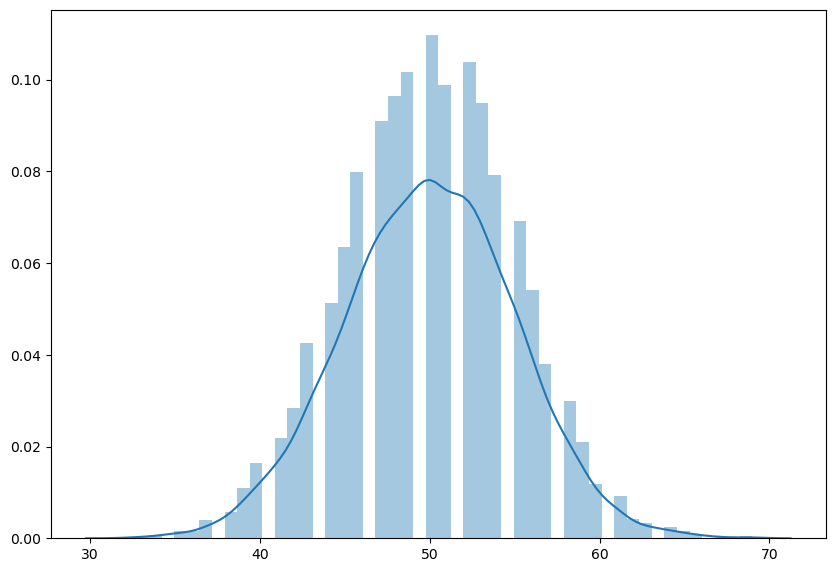

In [12]:
# results can be obtained with a single line of code
event = np.random.binomial(n=100,p=0.5,size=10000)
# a histogram with the kernal density estimate (KDE) overlaid best shows the shap of the curve
sns.distplot(event)

In [13]:
# step 1: simulate the event of flipping a coin 100 times
def coin_flip():
    x=np.random.binomial(100,0.5)
    return x

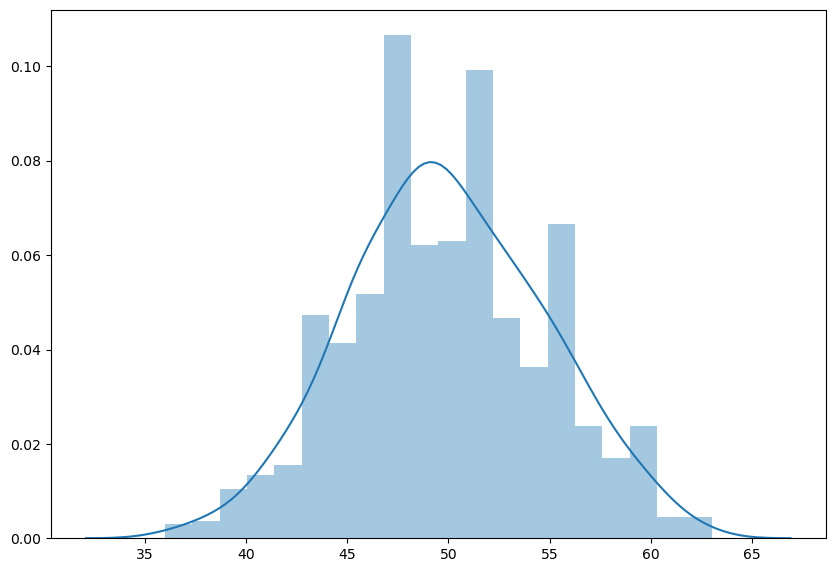

In [14]:
# creating an empty array to hold our output for repeating the event
thousand_flips = []
#for loop to repeat the event 1000 times and add to the output array
for i in range(1000):
    x = coin_flip()
    thousand_flips.append(x)
#showing the results in a histogram with an overlaid KDE
sns.distplot(thousand_flips)

***

## Task 4

*Simpson’s paradox is a well-known statistical paradox where a trend evident in a number of groups reverses when the groups are combined into one big data set. Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox. You might create your x arrays using numpy.linspace and create the y array for each x using notation like y = a * x + b where you choose the a and b for each x , y pair to demonstrate the paradox. You might see the Wikipedia page for Simpson’s paradox for inspiration.*

***

In [15]:
# creating 4 x-arrays using linspace
x1 = np.linspace(0,4,50)
x2 = np.linspace(1,5,50)
x3 = np.linspace(2,6,50)
x4 = np.linspace(3,7,50)
# this noise will prevent the results from just producing 4 straight lines
noise = np.random.normal(0,1.5,50)

<br>

For each x-array created above, a corresponding dependent y-array is created below, including some 'noise' so the results don't just provide a straight line. The slope of each of these equations is positive, so each individual equation shows a positive relationship between x and y

<br>

In [16]:
y1 = 4 * x1 + 15 + noise
y2 = 3 * x2 + 9 + noise
y3 = 3 * x3 - 4 + noise
y4 = 2 * x4 - 12 + noise

<br>

By plotting each of these relationships individually, it is evident that each one displays a positively roughly linear relationship.

<br>

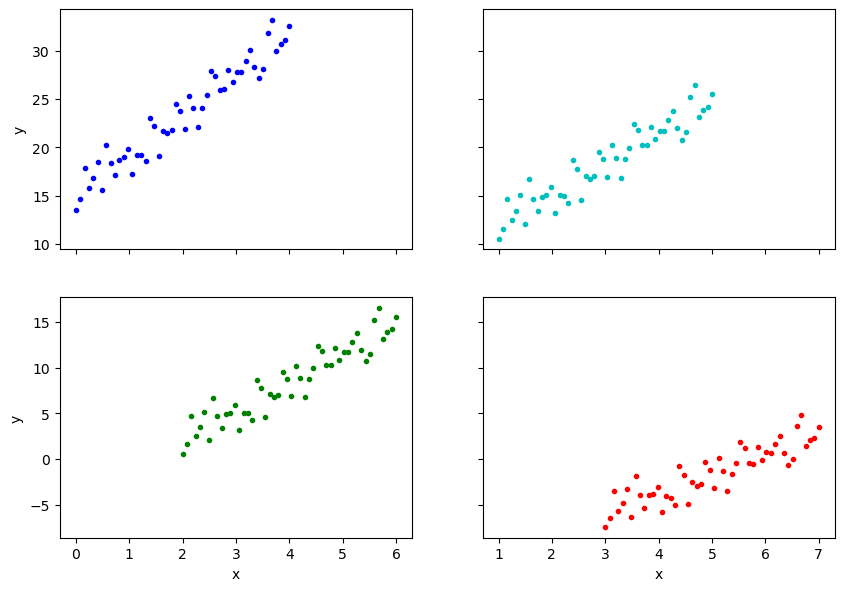

In [17]:
# this code has been taken from the matplotlib website [8] and adapted
fig, axs = plt.subplots(2, 2,sharex='col', sharey='row')
#axs.subplots(sharex='col', sharey='row')
axs[0, 0].plot(x1, y1, 'b.')
#axs[0, 0].set_title('4x+25')
axs[0, 1].plot(x2, y2, 'c.')
#axs[0, 1].set_title('5x+10')
axs[1, 0].plot(x3, y3, 'g.')
#axs[1, 0].set_title('3x-14')
axs[1, 1].plot(x4, y4, 'r.')
#axs[1, 1].set_title('2x-32')

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

<br>

However, when all values are plotted on an individual plot, rather than separately, and colour coding is removed, the points now appear to follow a negative trend

<br>

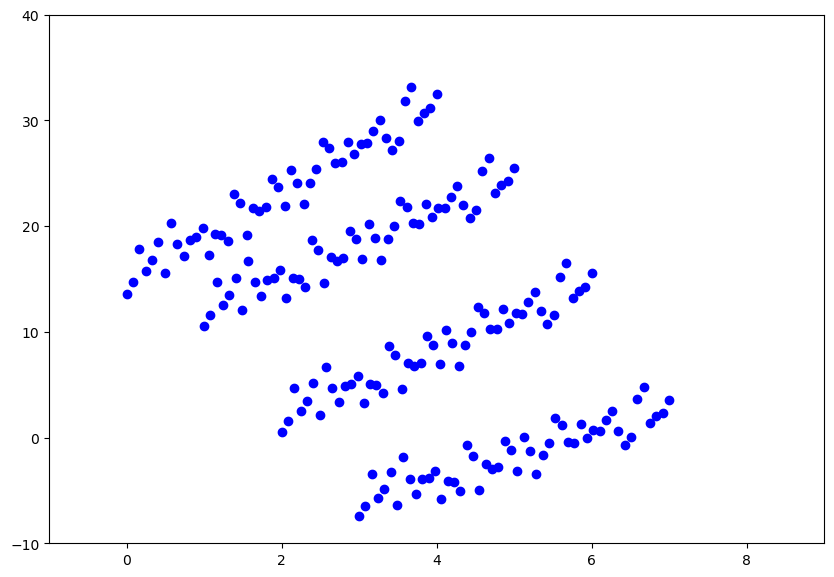

In [18]:
#y_all = y1+y2+y3+y4
plt.plot(x1,y1,'bo',scalex=False,scaley=False)
plt.plot(x2,y2,'bo',scalex=False,scaley=False)
plt.plot(x3,y3,'bo',scalex=False,scaley=False)
plt.plot(x4,y4,'bo',scalex=False,scaley=False)
plt.xlim([-1,9])
plt.ylim([-10,40])
plt.show()

<br>

This simple example, where the values used to initiate the experiment have a positively linear relationship by design, is a good reminder that all factors should be considered as a whole, as well as on an individual basis, before drawing a conclusion based on some isolated statistical analysis [7].

<br>

***

#### References:

[1] Data Structures; Python; https://docs.python.org/3/tutorial/datastructures.html

[2] Python Dictionaries; W3Schools; https://www.w3schools.com/python/python_dictionaries.asp

[3] Random; Python; https://docs.python.org/3/library/random.html

[4] Plot Dict; matplotlib; https://discourse.matplotlib.org/t/plot-dict/15277/3

[5] Central Limit Theorem; Wikipedia; https://en.wikipedia.org/wiki/Central_limit_theorem

[6] numpy.random.binomial; NumPy; https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

[7] Simpson's Paradox; Wikipedia; https://en.wikipedia.org/wiki/Simpson%27s_paradox

***

# End

***